In [1]:
from gensim.models import KeyedVectors
from tqdm.notebook import tqdm
gt_embeddings = '../evaluation/SWOWRP_embeddings.vec'
# sg_model = '../models/all_wikis_30%_gensim/baseline/baseline.vec'
# cbow_model = '../models/all_wikis_30%_cb/baseline/baseline.vec'
sg_torch_model = '../models/all_wikis_30%/baseline/baseline.vec'
gt_embeddings = KeyedVectors.load_word2vec_format(gt_embeddings, binary=False)
# sg_model = KeyedVectors.load_word2vec_format(sg_model, binary=False)
sg_torch_model = KeyedVectors.load_word2vec_format(sg_torch_model, binary=False)
# cbow_model = KeyedVectors.load_word2vec_format(cbow_model, binary=False)
models = {'SWOW-RP': {'embeddings': gt_embeddings}, 
          # 'SG': {'embeddings': sg_model},
          'Word2Vec': {'embeddings': sg_torch_model}, 
          # 'CBOW': {'embeddings': cbow_model}
          }

### Sample random words

In [2]:
import random
random.seed(42)
for model in models:
    n_words = 650 if model == 'SWOW-RP' else 1000
    models[model]['words'] = random.sample(models[model]['embeddings'].index_to_key, n_words)
    models[model]['other_words'] = [word for word in random.sample(models[model]['embeddings'].index_to_key, n_words * 10) if word not in models[model]['words']]

### Compute similarity between all pairs of words

In [3]:
def similarities(words, other_words, words_vectors):
    similarities = []
    for word in tqdm(words):
        for other_word in other_words:
            similarities.append(words_vectors.similarity(word, other_word))
    return similarities
for model in models:
    print(model)
    models[model]['similarities'] = similarities(models[model]['words'], 
                                                 models[model]['other_words'], 
                                                 models[model]['embeddings'])

SWOW-RP


  0%|          | 0/650 [00:00<?, ?it/s]

Word2Vec


  0%|          | 0/1000 [00:00<?, ?it/s]

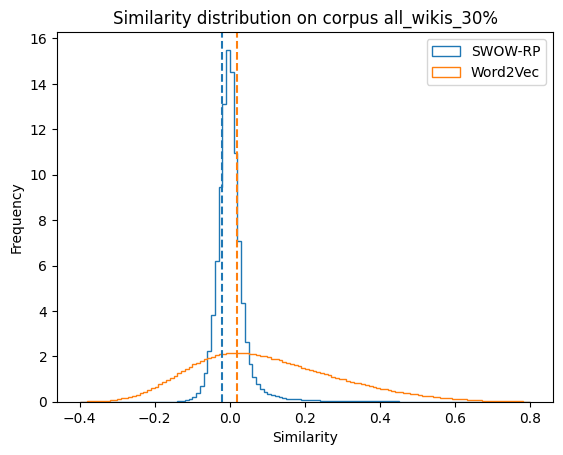

SWOW-RP
Percentage of similarities below SWOW-RP threshold: 0.24560320211479233
Word2Vec
Percentage of similarities below SG threshold: 0.3817488915759774


In [15]:
import matplotlib.pyplot as plt
import numpy as np

swow_threshold = -0.02
sg_threshold = 0.02

bins = np.arange(-0.4, 0.8, 0.01)
for model in models:
    plt.hist(models[model]['similarities'], bins=bins, density=True, label=model, histtype='step')
plt.legend(loc='upper right')
plt.xlabel('Similarity')
plt.ylabel('Frequency')
plt.axvline(x=swow_threshold, linestyle='--', color='tab:blue')
plt.axvline(x=sg_threshold, linestyle='--', color='tab:orange')
plt.title('Similarity distribution on corpus all_wikis_30%')
plt.savefig('../results/similarity_distribution.png')
plt.show()

# compute the percentage of similarities below the threshold
for model in models:
    print(model)
    if model == 'SWOW-RP':
        print(f'Percentage of similarities below SWOW-RP threshold: {np.mean(np.array(models[model]["similarities"]) < swow_threshold)}')
    else:
        print(f'Percentage of similarities below SG threshold: {np.mean(np.array(models[model]["similarities"]) < sg_threshold)}')